<a href="https://colab.research.google.com/github/yleessam/dl/blob/main/6_2_neural_network_basic_exercise_result.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 6.2 인공신경망 구성하기

## 6.2.2 인공신경망 구성하기 - 퀴즈

### 문제 1. 보스턴 집값 데이터는 업로드하기

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns

boston_df = pd.read_csv('exercise4.csv', index_col=None)
boston_df.head()

,평균 주택 면적,교통 편의지수,교육 점수,인구 밀집도,평균 주택 가격
0,83.910,16.0,67.021277,31.346578,34.8
1,88.920,24.0,55.319149,38.714128,36.6
2,95.925,96.0,80.851064,31.843267,43.4
3,100.170,16.0,36.170213,12.527594,57.2
4,92.430,8.0,22.340426,15.728477,48.2


In [5]:
boston_df.shape

(500, 5)

####기본 구성

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# 데이터 전처리
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(boston_df.drop('평균 주택 가격', axis=1))
X_train, X_test, y_train, y_test = train_test_split(
    scaled_features, boston_df['평균 주택 가격'], test_size=0.2, random_state=42
)

model = Sequential()
model.add(Dense(20, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(1)) # 출력층

# 모델 컴파일
model.compile(optimizer='adam', loss='mse')

# 조기 종료 콜백 설정
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# 모델 학습
model.fit(X_train, y_train, epochs=100, validation_split=0.1, callbacks=[early_stopping])

# 모델 평가
test_loss = model.evaluate(X_test, y_test)
print(f'\nTest loss: {test_loss}')

Epoch 1/100
12/12 [==============================] - 0s 9ms/step - loss: 2450.3062 - val_loss: 2256.7715
Epoch 2/100
12/12 [==============================] - 0s 3ms/step - loss: 2435.9834 - val_loss: 2243.5176
Epoch 3/100
12/12 [==============================] - 0s 4ms/step - loss: 2421.0105 - val_loss: 2229.3530
Epoch 4/100
12/12 [==============================] - 0s 3ms/step - loss: 2404.7107 - val_loss: 2213.5737
Epoch 5/100
12/12 [==============================] - 0s 3ms/step - loss: 2386.7471 - val_loss: 2195.6704
Epoch 6/100
12/12 [==============================] - 0s 3ms/step - loss: 2366.8621 - val_loss: 2175.6543
Epoch 7/100
12/12 [==============================] - 0s 3ms/step - loss: 2344.4783 - val_loss: 2153.5938
Epoch 8/100
12/12 [==============================] - 0s 3ms/step - loss: 2319.4016 - val_loss: 2128.7720
Epoch 9/100
12/12 [==============================] - 0s 3ms/step - loss: 2291.8569 - val_loss: 2101.6726
Epoch 10/100
12/12 [==============================] - 0

#### 레이어 추가

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# 데이터 전처리
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(boston_df.drop('평균 주택 가격', axis=1))
X_train, X_test, y_train, y_test = train_test_split(
    scaled_features, boston_df['평균 주택 가격'], test_size=0.2, random_state=42
)

model = Sequential()
model.add(Dense(32, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1)) # 출력층

# 모델 컴파일
model.compile(optimizer='adam', loss='mse')

# 조기 종료 콜백 설정
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# 모델 학습
model.fit(X_train, y_train, epochs=100, validation_split=0.1, callbacks=[early_stopping])

# 모델 평가
test_loss = model.evaluate(X_test, y_test)
print(f'\nTest loss: {test_loss}')

Epoch 1/100
12/12 [==============================] - 1s 16ms/step - loss: 2399.3589 - val_loss: 2198.0308
Epoch 2/100
12/12 [==============================] - 0s 3ms/step - loss: 2364.3394 - val_loss: 2163.8074
Epoch 3/100
12/12 [==============================] - 0s 3ms/step - loss: 2327.0173 - val_loss: 2124.6069
Epoch 4/100
12/12 [==============================] - 0s 3ms/step - loss: 2283.1147 - val_loss: 2078.0852
Epoch 5/100
12/12 [==============================] - 0s 3ms/step - loss: 2223.1199 - val_loss: 2019.3135
Epoch 6/100
12/12 [==============================] - 0s 3ms/step - loss: 2156.5706 - val_loss: 1944.2083
Epoch 7/100
12/12 [==============================] - 0s 3ms/step - loss: 2069.7290 - val_loss: 1850.3483
Epoch 8/100
12/12 [==============================] - 0s 4ms/step - loss: 1961.1134 - val_loss: 1736.3975
Epoch 9/100
12/12 [==============================] - 0s 4ms/step - loss: 1822.6302 - val_loss: 1601.5587
Epoch 10/100
12/12 [==============================] - 

4/4 [==============================] - 0s 3ms/step
   평균 주택 가격  Predicted Price
0      37.0        36.154194
1      42.4        46.269310
2      46.2        34.467743
3      29.8        36.391842
4      26.6        29.613520
5      35.0        41.901085
6      26.8        27.410309
7      48.6        41.059700
8      42.8        37.262203
9      44.8        34.199375


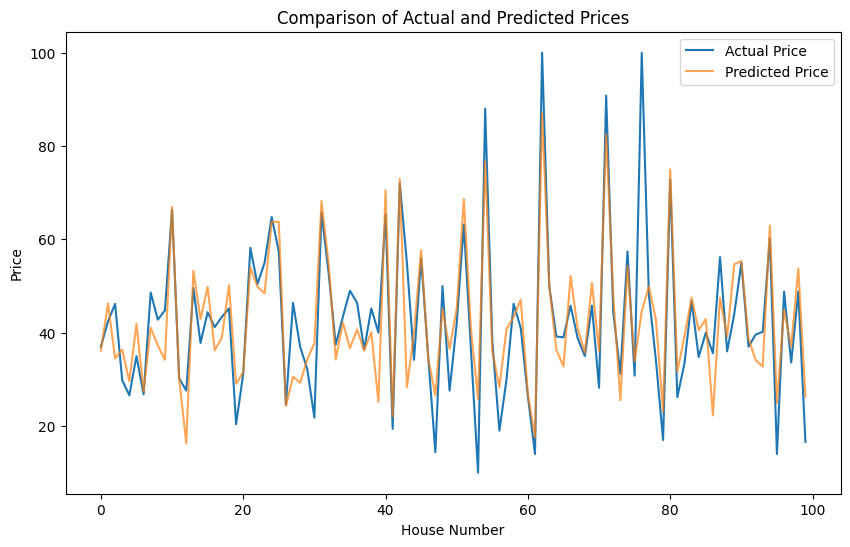

In [19]:
# 테스트 데이터를 이용한 예측
predicted_prices = model.predict(X_test)

# 예측 결과를 DataFrame으로 변환
predictions_df = pd.DataFrame(predicted_prices, columns=['Predicted Price'])

# 실제 가격과 예측 가격을 함께 보여주는 DataFrame 생성
results_df = pd.concat([y_test.reset_index(drop=True), predictions_df], axis=1)

# 결과 출력
print(results_df.head(10))

#	평균 주택 면적	교통 편의지수	교육 점수	인구 밀집도	평균 주택 가격

# 결과 시각화
plt.figure(figsize=(10,6))
plt.plot(results_df['평균 주택 가격'], label='Actual Price')
plt.plot(results_df['Predicted Price'], label='Predicted Price', alpha=0.7)
plt.title('Comparison of Actual and Predicted Prices')
plt.xlabel('House Number')
plt.ylabel('Price')
plt.legend()
plt.show()


### 문제 2. 유방암 데이터셋(Breast Cancer)

In [6]:
from sklearn.datasets import load_breast_cancer

# 데이터 불러오기
cancer = load_breast_cancer()
cancer_df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
cancer_df['target'] = cancer.target
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [7]:
cancer_df.shape

(569, 31)

In [25]:
cancer_df['target'].unique()

array([0, 1])

####기본 구성

4/4 [==============================] - 0s 2ms/step - loss: 0.0689 - accuracy: 0.9649
Test Accuracy: 96.49%
4/4 [==============================] - 0s 2ms/step
   Actual  Predicted
0       1          1
1       0          0
2       0          0
3       1          1
4       1          1


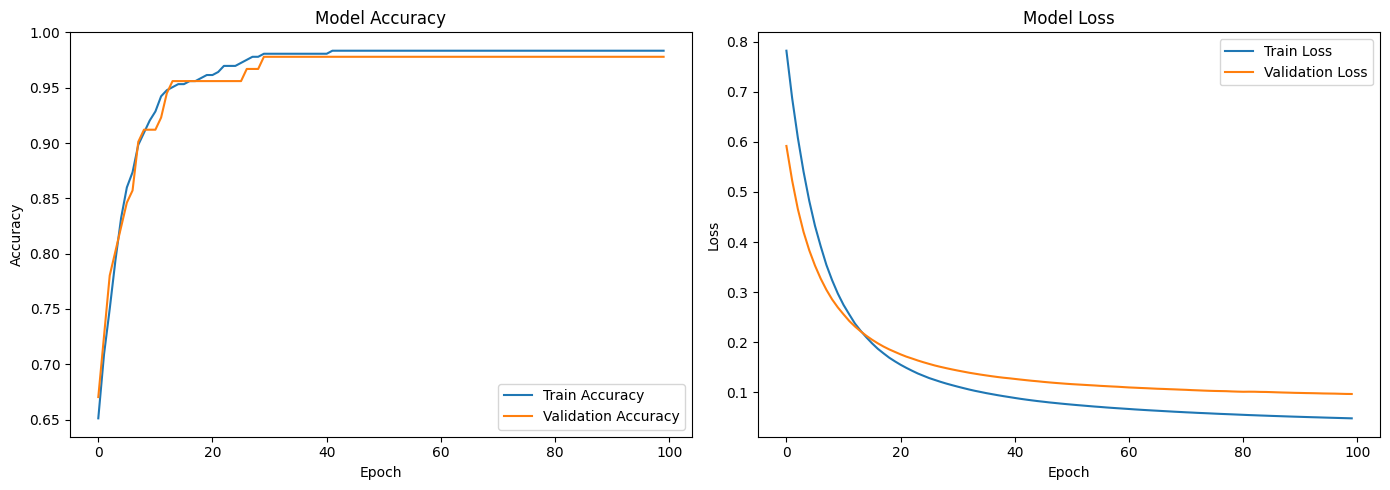

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, test_size=0.2, random_state=42)

# 데이터 스케일링
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 딥러닝 모델 설계
model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(1, activation='sigmoid'))

# 모델 컴파일
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 학습
history = model.fit(X_train, y_train, epochs=100, batch_size=50, validation_split=0.2, verbose=0)

# 테스트 데이터로 모델 평가
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy*100:.2f}%')

# 예측값 출력 및 시각화
predictions = model.predict(X_test)
predictions = predictions.flatten()
predictions = [1 if pred > 0.5 else 0 for pred in predictions]

# 예측값과 실제값을 데이터프레임으로 만들어 출력
predictions_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
print(predictions_df.head())

# 학습 과정 시각화
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()


#### 레이어 추가

4/4 [==============================] - 0s 3ms/step - loss: 0.0753 - accuracy: 0.9561
Test Accuracy: 95.61%
4/4 [==============================] - 0s 2ms/step
   Actual  Predicted
0       1          1
1       0          0
2       0          0
3       1          1
4       1          1


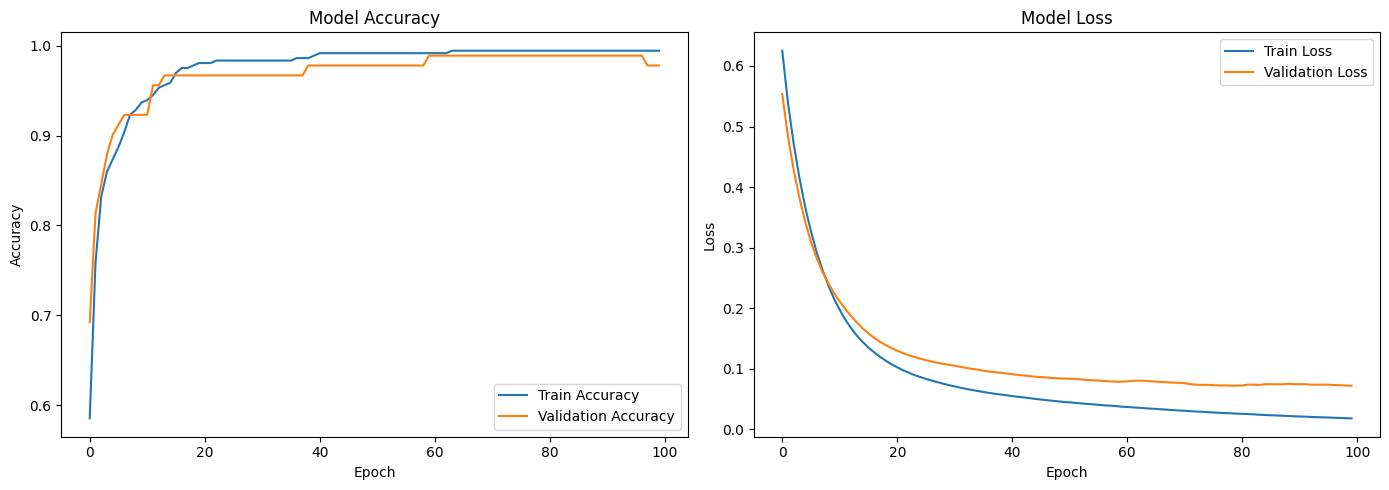

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, test_size=0.2, random_state=42)

# 데이터 스케일링
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 딥러닝 모델 설계
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 모델 컴파일
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 학습
history = model.fit(X_train, y_train, epochs=100, batch_size=50, validation_split=0.2, verbose=0)

# 테스트 데이터로 모델 평가
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy*100:.2f}%')

# 예측값 출력 및 시각화
predictions = model.predict(X_test)
predictions = predictions.flatten()
predictions = [1 if pred > 0.5 else 0 for pred in predictions]

# 예측값과 실제값을 데이터프레임으로 만들어 출력
predictions_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
print(predictions_df.head())

# 학습 과정 시각화
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()


### 문제3. 당뇨 데이터셋(Diabetes)

In [9]:
from sklearn.datasets import load_diabetes

# 데이터 불러오기
diabetes = load_diabetes()
diabetes_df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
diabetes_df['target'] = diabetes.target
diabetes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [10]:
diabetes_df.shape

(442, 11)

#### 기본 구성

3/3 [==============================] - 0s 3ms/step - loss: 4329.7021
Test loss: 4329.7021484375
3/3 [==============================] - 0s 3ms/step


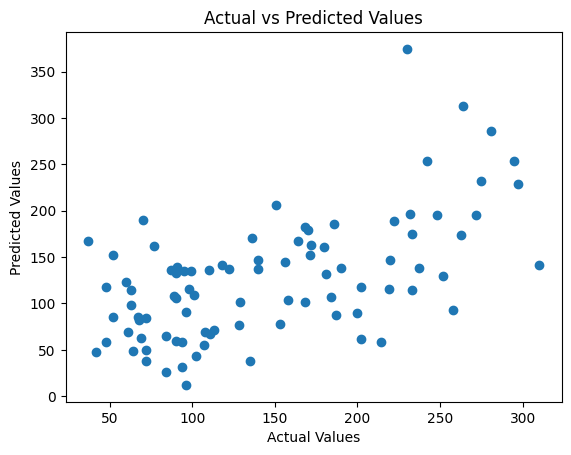

In [34]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

# 데이터 불러오기
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 전처리
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 모델 구성
model = Sequential()
model.add(Dense(15, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(1)) # 출력층

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 학습
history = model.fit(X_train, y_train, validation_split=0.2, epochs=150, batch_size=10, verbose=0)

# 모델 평가
loss = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')

# 예측
predictions = model.predict(X_test)

# 예측 결과 시각화
plt.scatter(y_test, predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()


#### 레이어 추가

3/3 [==============================] - 0s 3ms/step - loss: 2730.7322
Test loss: 2730.732177734375
3/3 [==============================] - 0s 3ms/step


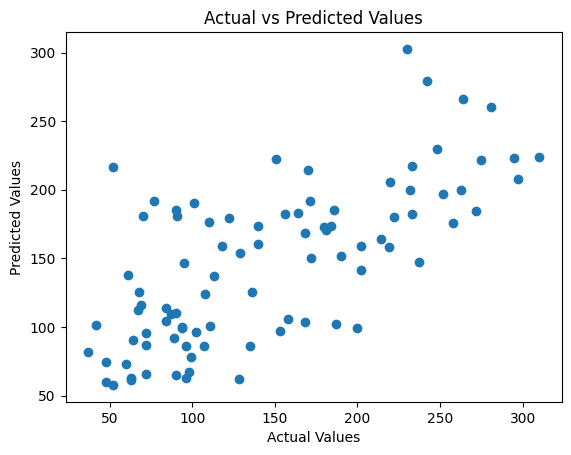

In [21]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

# 데이터 불러오기
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 전처리
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 모델 구성
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1)) # 출력층

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 학습
history = model.fit(X_train, y_train, validation_split=0.2, epochs=150, batch_size=10, verbose=0)

# 모델 평가
loss = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')

# 예측
predictions = model.predict(X_test)

# 예측 결과 시각화
plt.scatter(y_test, predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()


### 문제4. 숫자 데이터셋(Digits)

In [11]:
from sklearn.datasets import load_digits

# 데이터 불러오기
digits = load_digits()
digits_df = pd.DataFrame(data=digits.data, columns=digits.feature_names)
digits_df['target'] = digits.target
digits_df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [12]:
digits_df.shape

(1797, 65)

In [13]:
digits_df['target'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

#### 기본 구성

In [30]:
#데이터를 그대로 처리한 버전
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 데이터 불러오기
digits = load_digits()
X, y = digits.data, digits.target

# 데이터를 Pandas DataFrame으로 변환 (옵션)
digits_df = pd.DataFrame(data=X, columns=digits.feature_names)
digits_df['target'] = y

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 전처리: 입력 데이터 표준화
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 모델 구성
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))  # 10개의 출력 뉴런, 각 숫자 클래스에 해당

# 모델 컴파일
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 학습
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

# 모델 평가
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}, Test accuracy: {accuracy}')


Epoch 1/10
41/41 [==============================] - 1s 8ms/step - loss: 2.0010 - accuracy: 0.2985 - val_loss: 1.7371 - val_accuracy: 0.4306
Epoch 2/10
41/41 [==============================] - 0s 3ms/step - loss: 1.3593 - accuracy: 0.5847 - val_loss: 1.2293 - val_accuracy: 0.7292
Epoch 3/10
41/41 [==============================] - 0s 7ms/step - loss: 0.9320 - accuracy: 0.8244 - val_loss: 0.8385 - val_accuracy: 0.8264
Epoch 4/10
41/41 [==============================] - 0s 6ms/step - loss: 0.6143 - accuracy: 0.8987 - val_loss: 0.5644 - val_accuracy: 0.8611
Epoch 5/10
41/41 [==============================] - 0s 6ms/step - loss: 0.4027 - accuracy: 0.9312 - val_loss: 0.4148 - val_accuracy: 0.9167
Epoch 6/10
41/41 [==============================] - 0s 7ms/step - loss: 0.2848 - accuracy: 0.9459 - val_loss: 0.3412 - val_accuracy: 0.9236
Epoch 7/10
41/41 [==============================] - 0s 5ms/step - loss: 0.2150 - accuracy: 0.9629 - val_loss: 0.3113 - val_accuracy: 0.9375
Epoch 8/10
41/41 [==

#### 레이어 추가

In [28]:
#타겟 원핫인코딩, 은닉층 추가를 통한 성능 개선

import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# 데이터 불러오기
digits = load_digits()
X, y = digits.data, digits.target

# 데이터를 Pandas DataFrame으로 변환 (옵션)
digits_df = pd.DataFrame(data=X, columns=digits.feature_names)
digits_df['target'] = y

# 타겟 변수를 카테고리형으로 변환
y_cat = to_categorical(y)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2, random_state=42)

# 데이터 전처리: 입력 데이터 표준화
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 모델 구성
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))  # 10개의 출력 뉴런, 각 숫자 클래스에 해당

# 모델 컴파일
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 학습
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

# 모델 평가
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}, Test accuracy: {accuracy}')


Epoch 1/10
41/41 [==============================] - 1s 5ms/step - loss: 1.7620 - accuracy: 0.5043 - val_loss: 1.1694 - val_accuracy: 0.8333
Epoch 2/10
41/41 [==============================] - 0s 2ms/step - loss: 0.7381 - accuracy: 0.8701 - val_loss: 0.5292 - val_accuracy: 0.8611
Epoch 3/10
41/41 [==============================] - 0s 2ms/step - loss: 0.3459 - accuracy: 0.9180 - val_loss: 0.3546 - val_accuracy: 0.8958
Epoch 4/10
41/41 [==============================] - 0s 2ms/step - loss: 0.2130 - accuracy: 0.9551 - val_loss: 0.2636 - val_accuracy: 0.9236
Epoch 5/10
41/41 [==============================] - 0s 3ms/step - loss: 0.1499 - accuracy: 0.9667 - val_loss: 0.2287 - val_accuracy: 0.9375
Epoch 6/10
41/41 [==============================] - 0s 2ms/step - loss: 0.1096 - accuracy: 0.9783 - val_loss: 0.1859 - val_accuracy: 0.9514
Epoch 7/10
41/41 [==============================] - 0s 2ms/step - loss: 0.0834 - accuracy: 0.9869 - val_loss: 0.1731 - val_accuracy: 0.9514
Epoch 8/10
41/41 [==

### 문제5. 와인 데이터 셋(Wine)

In [14]:
from sklearn.datasets import load_wine

# 데이터 불러오기
wine = load_wine()
wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
wine_df['target'] = wine.target
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [15]:
wine_df.shape

(178, 14)

In [16]:
wine_df['target'].unique()

array([0, 1, 2])

#### 기본 구성

In [33]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 데이터 불러오기
wine = load_wine()
X, y = wine.data, wine.target

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 전처리: 입력 데이터 표준화
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 모델 구성
model = Sequential([
    Dense(13, input_dim=13, activation='relu'),  # 입력층 및 첫 번째 은닉층, 입력 특성 수는 13개
    Dense(10, activation='relu'),  # 두 번째 은닉층, 뉴런 수는 10개
    Dense(12, activation='relu'),  # 세 번째 은닉층, 뉴런 수는 12개
    Dense(3, activation='softmax')  # 출력층, 클래스 수는 3개
])

# 모델 컴파일
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 요약
model.summary()

# 모델 학습
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

# 모델 평가
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}, Test accuracy: {accuracy}')


Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 13)                182       
                                                                 
 dense_40 (Dense)            (None, 10)                140       
                                                                 
 dense_41 (Dense)            (None, 12)                132       
                                                                 
 dense_42 (Dense)            (None, 3)                 39        
                                                                 
Total params: 493 (1.93 KB)
Trainable params: 493 (1.93 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
4/4 [==============================] - 1s 61ms/step - loss: 1.0763 - accuracy: 0.3780 - val_loss: 0.9345 - val_accuracy: 0.6667
Epoch 2/10
4/4 [

####레이어 추가

Epoch 1/50
4/4 [==============================] - 1s 43ms/step - loss: 1.0552 - accuracy: 0.3540 - val_loss: 1.0141 - val_accuracy: 0.2414
Epoch 2/50
4/4 [==============================] - 0s 9ms/step - loss: 0.9470 - accuracy: 0.4867 - val_loss: 0.9078 - val_accuracy: 0.4828
Epoch 3/50
4/4 [==============================] - 0s 8ms/step - loss: 0.8583 - accuracy: 0.6637 - val_loss: 0.8143 - val_accuracy: 0.7241
Epoch 4/50
4/4 [==============================] - 0s 9ms/step - loss: 0.7787 - accuracy: 0.7699 - val_loss: 0.7329 - val_accuracy: 0.7931
Epoch 5/50
4/4 [==============================] - 0s 8ms/step - loss: 0.7068 - accuracy: 0.8584 - val_loss: 0.6605 - val_accuracy: 0.9310
Epoch 6/50
4/4 [==============================] - 0s 9ms/step - loss: 0.6414 - accuracy: 0.9292 - val_loss: 0.5928 - val_accuracy: 0.9310
Epoch 7/50
4/4 [==============================] - 0s 8ms/step - loss: 0.5806 - accuracy: 0.9381 - val_loss: 0.5297 - val_accuracy: 0.9655
Epoch 8/50
4/4 [=================

2/2 [==============================] - 0s 5ms/step
   Actual  Predicted
0       0          0
1       0          0
2       2          2
3       0          0
4       1          1


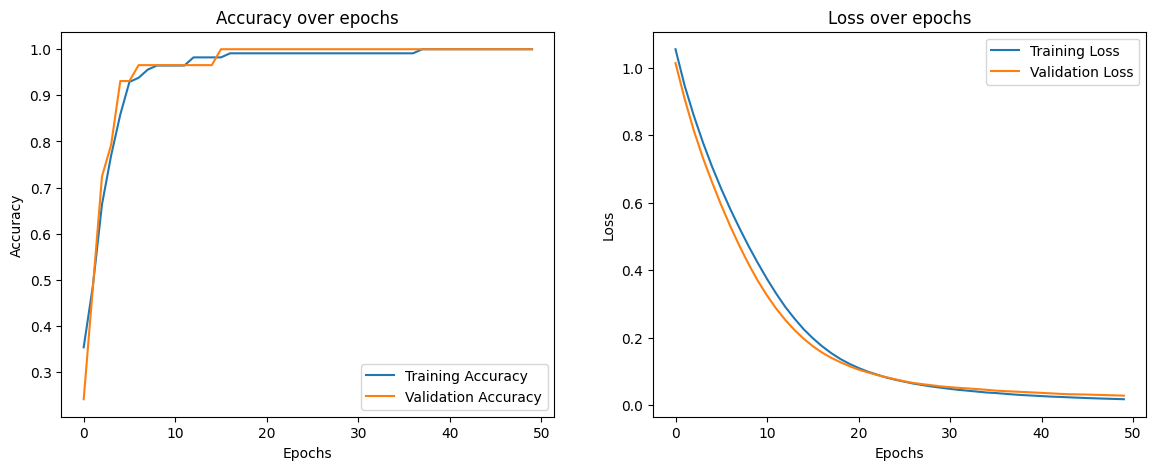

In [32]:

import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# 데이터셋 로드
wine = load_wine()
wine_data = wine.data
wine_target = wine.target

# 데이터셋 분할
X_train, X_test, y_train, y_test = train_test_split(wine_data, wine_target, test_size=0.2, random_state=42)

# 데이터 정규화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 타겟을 원-핫 인코딩
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

# 모델 생성
model = Sequential()
model.add(Dense(64, input_shape=(X_train_scaled.shape[1],), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(y_train_categorical.shape[1], activation='softmax'))

# 모델 컴파일
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = model.fit(X_train_scaled, y_train_categorical, epochs=50, validation_split=0.2)

# 모델 평가
loss, accuracy = model.evaluate(X_test_scaled, y_test_categorical)
print(f'Test loss: {loss}, Test accuracy: {accuracy:.4f}')

# 예측
predictions = model.predict(X_test_scaled)
predicted_classes = np.argmax(predictions, axis=1)



# 예측 결과를 데이터프레임으로 변환하여 출력
predicted_classes_df = pd.DataFrame({'Actual': y_test, 'Predicted': predicted_classes})
print(predicted_classes_df.head())


# 시각화를 위해 훈련 과정에서의 정확도와 손실 값을 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))

# 정확도 그래프
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# 손실 그래프
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()
